# Diabetes Prediction

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# loading the dataset
df = pd.read_csv('diabetes.csv')

# Exploring the dataset


In [ ]:
# exploring number of rows and columns of the dataset
df.shape

(2000, 9)

In [ ]:
# returning an object with all of the column headers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# getting data types of each column
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# getting basic information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
# checking if there are any null values in dataset
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Observations
1. There are 9 features in the dataset.

2. Each feature is either of integer or float datatype.

3. There are zero NaN values in the dataset.

4. In the outcome column, 1 represents that person has diabetes and 0 represents person does'nt have diabetes

In [ ]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# return basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Data Visualization

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list1 = df.columns[:-1]
list1

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age'],
      dtype='object')

In [ ]:
correlation = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DPF','Age','Outcome']].corr()
correlation

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Glucose,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DPF,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

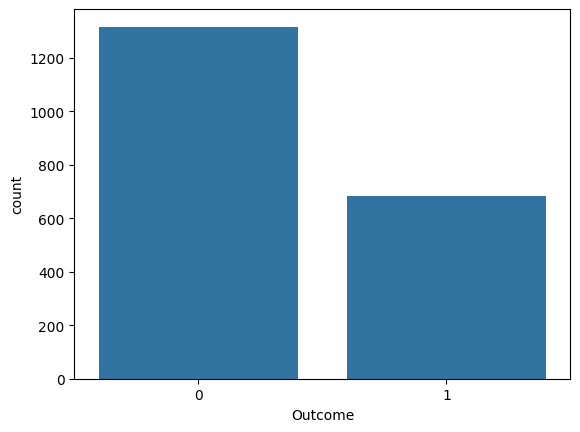

In [ ]:
# Outcome countplot
sns.countplot(x='Outcome', data = df)

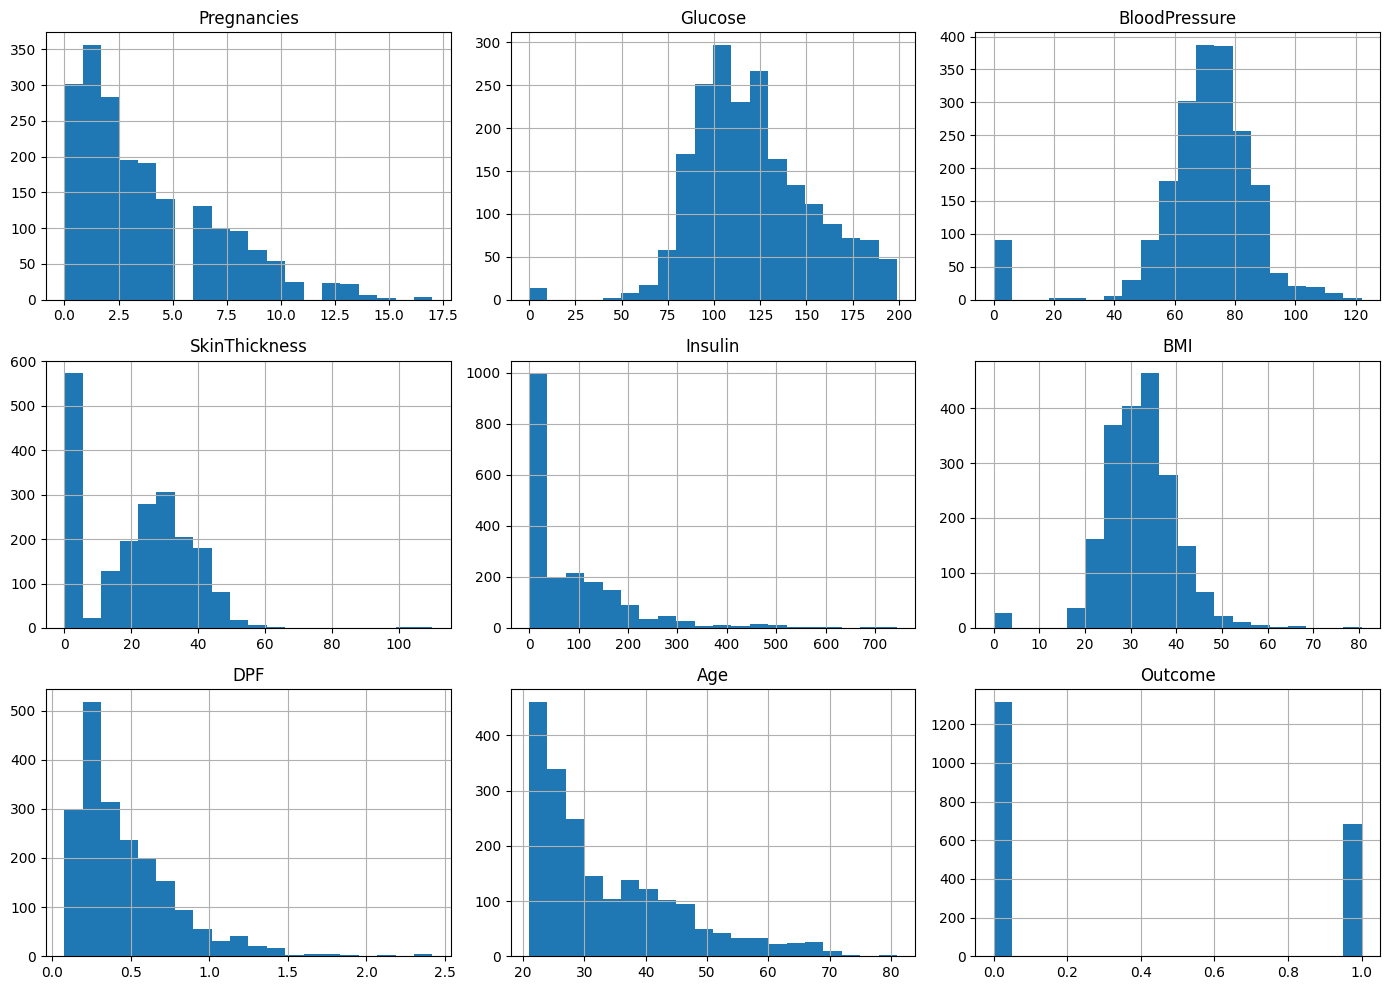

In [ ]:
# Plotting histogram of each feature
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

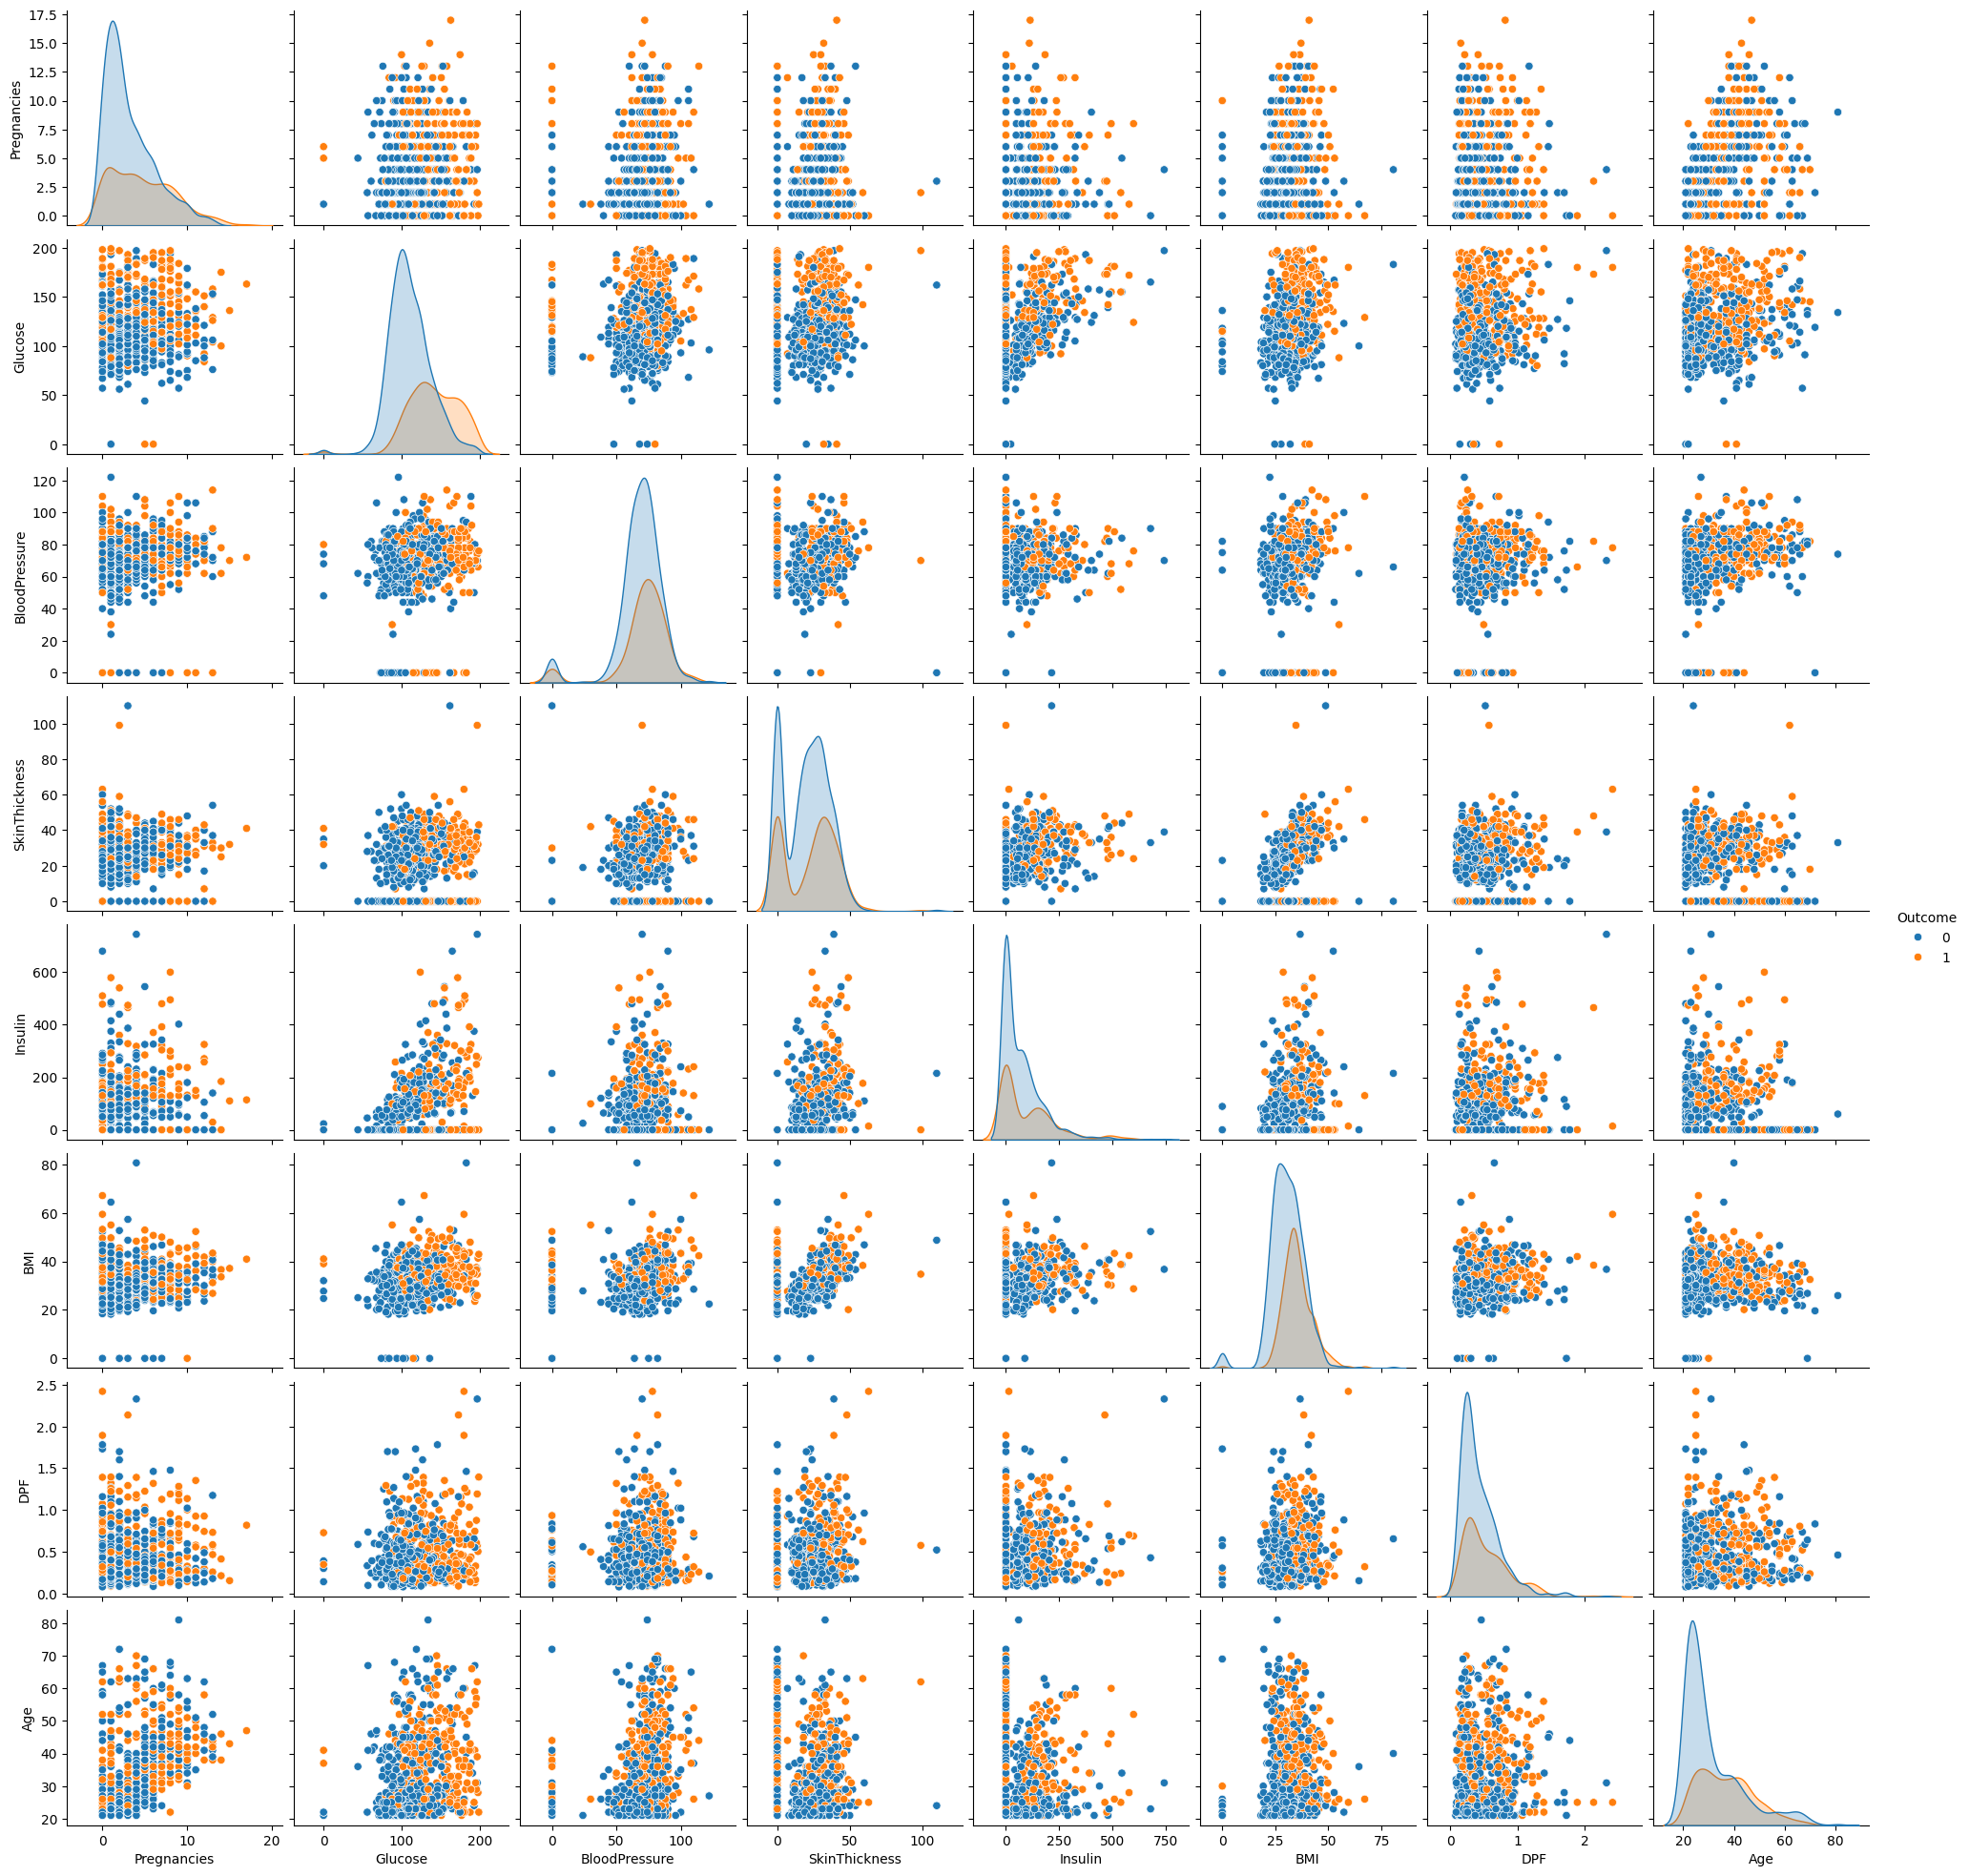

In [ ]:
# Scatter plot matrix
sns.pairplot(df, hue='Outcome')
plt.show()

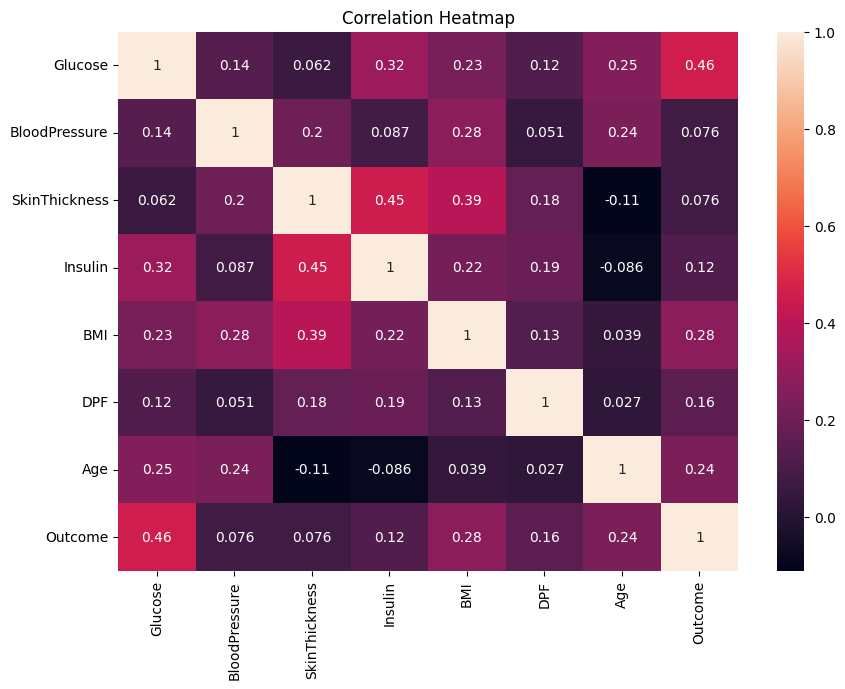

In [ ]:
# plotting heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Observations from above plots:
1. Counplot tells us that dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correlation heatmap, we can see that there is a high correlation between Outcome and [Glucose, BMI, Age, Insulin]. We can select these features/columns to accept the input from user and predict the outcome

# Data preprocssing

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

# Combine scaled features with the target variable for further analysis
data_scaled = pd.concat([X_scaled, y], axis=1)
print(data_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

        DPF       Age  
0  0.020922  0.433333  
1  0.066183  0.033333  
2  0.235696  0.166667  
3  0.122545  0.050000  
4  0.195559  0.000000  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814 

<ipython-input-23-3c0caad53a35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Outcome, color="b")


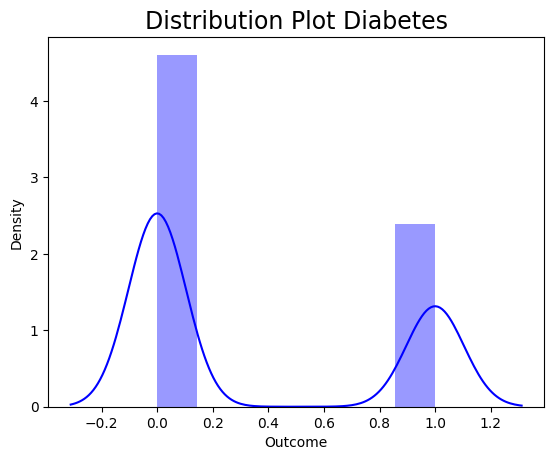

In [ ]:
# Create a distribution plot for rating
sns.distplot(df.Outcome, color="b")
plt.title("Distribution Plot Diabetes", fontsize=17, color = 'black')
plt.show()

# Model Training

In [ ]:
# X = dataset.iloc[:, :-1].values #Independent Variable
# Y = dataset.iloc[:, -1].values #Dependent Variable

from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [ ]:
print(X_train,Y_train)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
582            12      121             78             17        0  26.5   
159            17      163             72             41      114  40.9   
1827            1      102             74              0        0  39.5   
318             3      115             66             39      140  38.1   
708             9      164             78              0        0  32.8   
...           ...      ...            ...            ...      ...   ...   
835             5       99             54             28       83  34.0   
1216            6      190             92              0        0  35.5   
1653            4       95             64              0        0  32.0   
559            11       85             74              0        0  30.1   
684             5      136             82              0        0   0.0   

        DPF  Age  
582   0.259   62  
159   0.817   47  
1827  0.293   42  
318   0.150   28  
708 

In [ ]:
print(X_test,Y_test)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
405             2      123             48             32      165  42.1   
1190            2      106             56             27      165  29.0   
1132            6      195             70              0        0  30.9   
731             8      120             86              0        0  28.4   
1754            4      145             82             18        0  32.5   
...           ...      ...            ...            ...      ...   ...   
638             7       97             76             32       91  40.9   
360             5      189             64             33      325  31.2   
1810            1      149             68             29      127  29.3   
1743            2      155             52             27      540  38.7   
563             6       99             60             19       54  26.9   

        DPF  Age  
405   0.520   26  
1190  0.426   22  
1132  0.328   31  
731   0.259   22  
1754

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(f_classif,k=5)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}
Best Score: 0.9500


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Logistic Regression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', C=1)
lr_scores = cross_val_score(lr, X_train, y_train, cv=cv)
print("Logistic Regression")
print(f"Mean Accuracy: {lr_scores.mean():.4f}")
print(f"Standard Deviation: {lr_scores.std():.4f}\n")

# Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt_scores = cross_val_score(dt, X_train, y_train, cv=cv)
print("Decision Tree")
print(f"Mean Accuracy: {dt_scores.mean():.4f}")
print(f"Standard Deviation: {dt_scores.std():.4f}\n")

# Random Forest
rf = RandomForestClassifier(n_estimators=50, criterion='gini')
rf_scores = cross_val_score(rf, X_train, y_train, cv=cv)
print("Random Forest")
print(f"Mean Accuracy: {rf_scores.mean():.4f}")
print(f"Standard Deviation: {rf_scores.std():.4f}\n")

# Support Vector Machine
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm_scores = cross_val_score(svm, X_train, y_train, cv=cv)
print("Support Vector Machine")
print(f"Mean Accuracy: {svm_scores.mean():.4f}")
print(f"Standard Deviation: {svm_scores.std():.4f}\n")


Logistic Regression
Mean Accuracy: 0.7750
Standard Deviation: 0.0252

Decision Tree
Mean Accuracy: 0.7888
Standard Deviation: 0.0294

Random Forest
Mean Accuracy: 0.9463
Standard Deviation: 0.0105

Support Vector Machine
Mean Accuracy: 0.8088
Standard Deviation: 0.0268



In [ ]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, Y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [ ]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Model Evaluation


In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[272,   0],
       [  5, 123]])

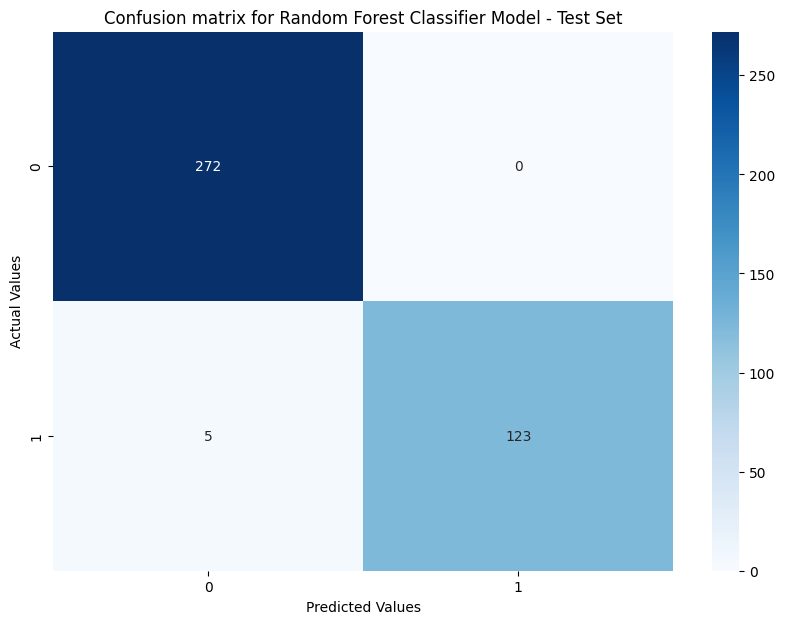

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(Y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))


Accuracy on test set: 98.75%


In [ ]:
# Classification Report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(Y_train, y_train_pred)
cm

array([[1044,    0],
       [   1,  555]])

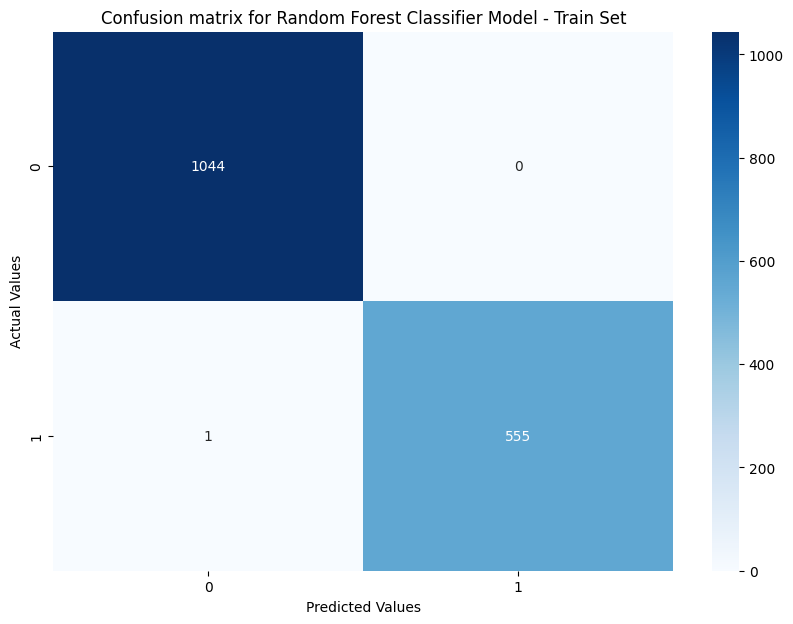

In [ ]:

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(Y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.94%


In [ ]:
# Classification Report
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# ensemble models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize other models
lr = LogisticRegression()
svc = SVC(probability=True, kernel='linear')

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('svc', svc)
], voting='soft')

# Fit Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate Voting Classifier
print("Voting Classifier Performance:")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_voting):.4f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred_voting))


Voting Classifier Performance:
Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       272
           1       0.87      0.72      0.79       128

    accuracy                           0.88       400
   macro avg       0.87      0.83      0.85       400
weighted avg       0.87      0.88      0.87       400



# Predictions

In [ ]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")


Oops! You have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
